In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('output_lyrics.csv')

In [3]:
artist =['Ramones', 'Heads', 'Blondie', 'Pop']

In [4]:
df.head()

,text,label
0,"I saw her today, I saw her face, it was a face...",Ramones
1,You're loudmouth baby You better shut up I'm g...,Ramones
2,"Next time I'll listen to my heart Next time, w...",Ramones
3,"Hey, little girl, I want to be your boyfriend ...",Ramones
4,"Hey, daddy-o I don't want to go down to the ba...",Ramones


In [5]:
df.groupby(by='label').count()

,text
label,
Bee Gees,1
Blondie,236
Blue Öyster Cult,1
Bon Iver,1
Bruce Springsteen,1
David Bowie,8
Debbie Harry,3
Feedom,1
Foster the People,1


In [6]:
df_test = pd.DataFrame(columns=['text', 'label'])
df_train = pd.DataFrame(columns=['text', 'label'])

In [7]:
df_test

,text,label


In [9]:
artist_count = {'Ramones': 0, 'Heads': 0, 'Blondie': 0, 'Pop': 0}

for i, j in df.iterrows():
    if str(j).split()[-5] in artist:
        if artist_count[str(j).split()[-5]] < 150:
            df_train.loc[i] = [df['text'][i]] + [df['label'][i]]
            artist_count[str(j).split()[-5]] += 1
        else:
            df_test.loc[i] = [df['text'][i]] + [df['label'][i]]
    else:
        continue

In [10]:
df_train.shape

(600, 2)

In [11]:
cv = CountVectorizer(stop_words = 'english')

vec = cv.fit_transform(df_train['text'].values.tolist())

In [12]:
tf = TfidfTransformer()

vec2 = tf.fit_transform(vec)

In [15]:
X = vec2
y = df_train['label']

In [16]:
m = MultinomialNB()
m.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
m.score(X, y)

0.96

In [18]:
df_test.head()

,text,label
293,Electric guitar gets run over by a car on the ...,Talking Heads
294,And all I see is little dots Some are smeared ...,Talking Heads
295,"Think of London, a small city It's dark, dark ...",Talking Heads
296,I'm mad...and that's a fact I found out...anim...,Talking Heads
297,Air...Air Hit me in the face I run faster Fast...,Talking Heads


In [19]:
df_test.shape

(351, 2)

In [20]:
vec_test = cv.transform(df_test['text'].values.tolist())

vec_test_final = tf.transform(vec_test)

In [21]:
vec2 = tf.fit_transform(vec_test_final)

In [22]:
ypred = m.predict(vec_test_final)

In [23]:
df_test['ypred'] = ypred

In [24]:
#df_test[df_test['label'] == 'Iggy Pop']

In [25]:
m.score(vec2, df_test['label'])

0.5270655270655271

In [26]:
checklist = []

for i, j in df_test.iterrows():
    if j['label'] == j['ypred']:
        checklist.append(1)
    else:
        checklist.append(0)
        
np.array(checklist).mean()

0.5042735042735043

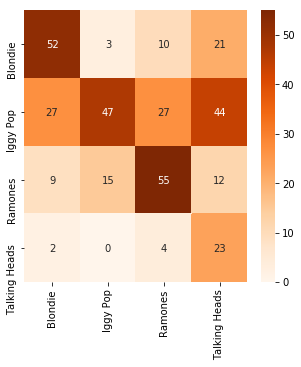

In [27]:
#confusion_matrix(df_test['label'], df_test['ypred'])
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(df_test['label'], df_test['ypred']),
            annot=True,
            cmap='Oranges',
            xticklabels=['Blondie', 'Iggy Pop', 'Ramones', 'Talking Heads'],
            yticklabels=['Blondie', 'Iggy Pop', 'Ramones', 'Talking Heads'])

Blondie = 236
Iggy = 295
Patti Smith = 114
Ramones = 241
Talking Heads = 179